<a href="https://www.kaggle.com/code/saneryesil/ke-if-i-veri-analizi-exploring-data-analysis?scriptVersionId=121966104" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Keşifçi Veri Analizi | Exploring Data Analysis

Aşağıda ihtiyacımız doğrultusunda kullanacağımız kütüphaneleri yükleyelim.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

Veri çerçevemizi bulunduğumuz dizinden yükleyelim ve bir veri çerçevesi haline getirerek df değişkenine atayalım. (pd.read_csv(...csv))

In [2]:
df = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")

Veri çerçevesinin ilk 5 gözlemini görüntüleyelim.

In [3]:
df.head(5) # Head komutu sayesinde baştan istediğimiz kadar sayıdaki veriyi görebiliriz.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Veri çerçevesinin kaç öznitelik ve kaç gözlemden oluştuğunu görüntüleyelim.

In [4]:
df.shape # Datasetin kaç satır sütuna sahip olduğunu gösteriyor.

(150, 5)

Veri çerçevesindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımını görüntüleyelim.

In [5]:
df.info() # Dataset hakkında ayrıntılı bilgi almak için kullanıyoruz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

Standart sapma ve ortalama değerlerden çıkarımda bulunarak hangi değişkenlerin ne kadar varyansa sahip olduğu hakkında fikir yürütelim.

In [6]:
df.describe().T # Standart sapma arttıkça varyans artar, azaldıkça azalır. Buna bağlı olarak petal_length en çok değere, sepal_width en az değere sahiptir.

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


Veri çerçevesinde hangi öznitelikte kaç adet eksik değer olduğunu gözlemleyelim.

In [7]:
df.isna().sum() 
# Datasetimizde ne kadar eksik değer olduğunu öğrenmek için kullanıyoruz. isna() fonksiyonu sorgulamayı gerçekleştirirken sum() eksik değerleri topluyor.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Sayısal değişkenler arasında korelasyon olup olmadığını göstermek için korelasyon matrisi çizdirelim. Korelasyon katsayıları hakkında fikir yürütelim.

En güçlü pozitif ilişki hangi iki değişken arasındadır?

In [8]:
df.corr() # En güçlü pozitif ilişki petal_length ve petal_width arasındadır.

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Korelasyon katsayılarını daha iyi okuyabilmek için ısı haritası çizdirelim.

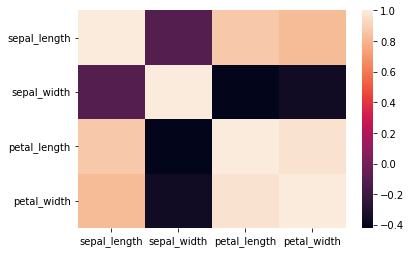

In [9]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

Veri çerçevemizin hedef değişkeninin "variety" benzersiz değerlerini görüntüleyelim.

In [10]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Veri çerçevemizin hedef değişkeninin "variety" benzersiz kaç adet değer içerdiğini görüntüleyelim.

In [11]:
df["species"].nunique()

3

Veri çerçevesindeki sepal.width ve sepal.length değişkenlerinin sürekli olduğunu görüyoruz. Bu iki sürekli veriyi görselleştirmek için önce scatterplot kullanalım.

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

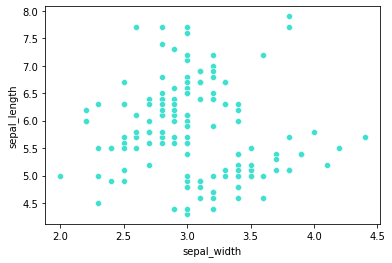

In [12]:
sns.scatterplot(x="sepal_width", y="sepal_length", data=df, color="turquoise")

Aynı iki veriyi daha farklı bir açıdan frekanslarıyla incelemek için jointplot kullanarak görselleştirelim. 

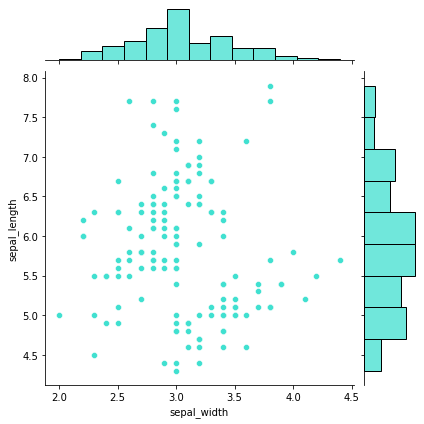

In [13]:
sns.jointplot(x="sepal_width",y="sepal_length",data=df,color="turquoise")

Aynı iki veriyi scatterplot ile tekrardan görselleştirelim fakat bu sefer "variety" parametresi ile hedef değişkenine göre kırdıralım. 

3 farklı renk arasında sepal değişkenleriyle bir kümeleme yapılabilir mi? Ne kadar ayırt edilebilir bunun üzerine düşünelim.

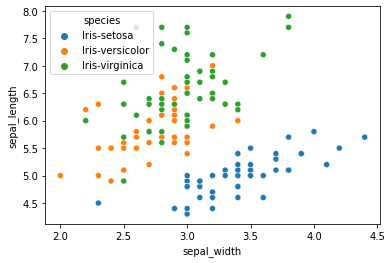

In [14]:
sns.scatterplot(x="sepal_width", y="sepal_length",hue="species",data=df);
# Hue değişkeni sayesinde grafiğimize boyut kazandırdık ve bu sayede farklı değişkenleri aynı anda inceleme şansı yakaladık.

value_counts() fonksiyonu ile veri çerçevemizin ne kadar dengeli dağıldığını sorgulayalım. 

In [15]:
df["species"].value_counts() # Species içerisindeki sınıf ve gözlenme sıklıkarına erişiyoruz.

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Keman grafiği çizdirerek sepal.width değişkeninin dağılımını inceleyin. 

Söz konusu dağılım bizim için ne ifade ediyor, normal bir dağılım olduğunu söyleyebilir miyiz?

<AxesSubplot:ylabel='sepal_width'>

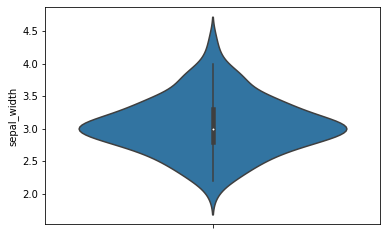

In [16]:
sns.violinplot(y="sepal_width",data=df) 
# Yoğunluk yaşanan bölüm bize medyan değerimizi ifade ediyor.

Daha iyi anlayabilmek için sepal.width üzerine bir distplot çizdirelim.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

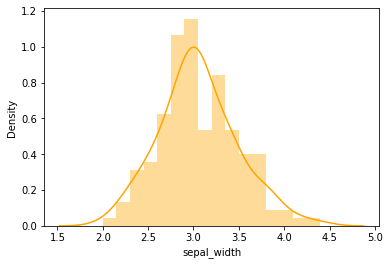

In [17]:
sns.distplot(df["sepal_width"],bins=16,color="orange") # Displot sayesinde dağılım grafiği üzerinde istediğimiz değişkeni görebiliyoruz.

Üç çiçek türü için üç farklı keman grafiğini sepal.length değişkeninin dağılımı üzerine tek bir satır ile görselleştirelim.

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

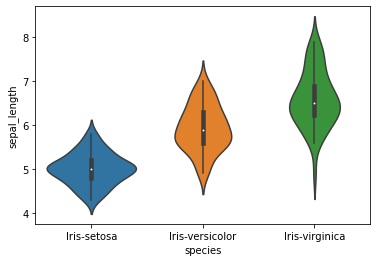

In [18]:
sns.violinplot(x="species",y="sepal_length",data=df) 

Hangi çiçek türünden kaçar adet gözlem barındırıyor veri çerçevemiz?

50 x 3 olduğunu ve dengeli olduğunu value_counts ile zaten görmüştük, ancak bunu görsel olarak ifade etmek için sns.countplot() fonksiyonuna variety parametresini vereilm.

<AxesSubplot:xlabel='species', ylabel='count'>

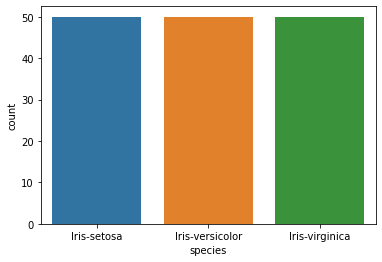

In [19]:
sns.countplot(x="species",data=df)

sepal.length ve sepal.width değişkenlerini sns.jointplot ile görselleştirelim, dağılımı ve dağılımın frekansı yüksek olduğu bölgelerini inceleyelim.

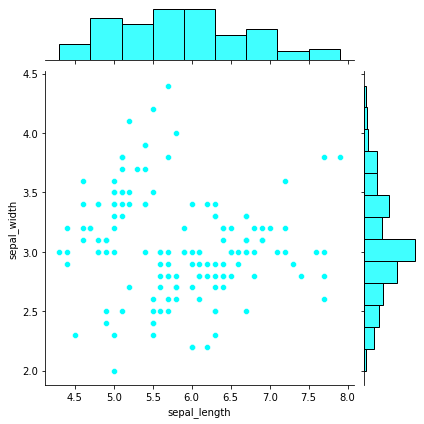

In [20]:
sns.jointplot(data=df,x="sepal_length",y="sepal_width",color="cyan")

Bir önceki hücrede yapmış olduğumuz görselleştirmeye kind = "kde" parametresini ekleyelim. Böylelikle dağılımın noktalı gösterimden çıkıp yoğunluk odaklı bir görselleştirmeye dönüştüğünü görmüş olacağız.

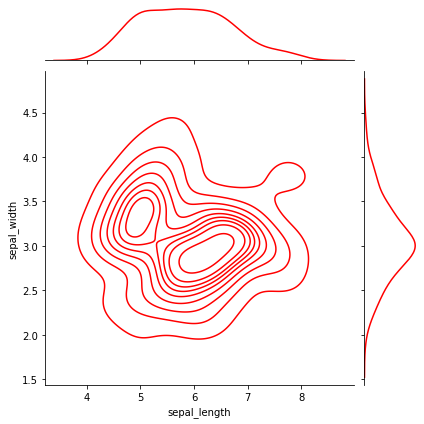

In [21]:
sns.jointplot(data=df,x="sepal_length",y="sepal_width",kind="kde",color="red")

scatterplot ile petal.length ve petal.width değişkenlerinin dağılımlarını çizdirelim.

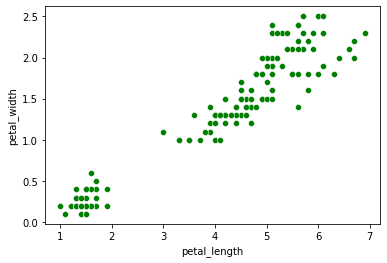

In [22]:
sns.scatterplot(x="petal_length",y="petal_width",data=df, color="green");

Aynı görselleştirmeye hue = "variety" parametresini ekleyerek 3. bir boyut verelim.

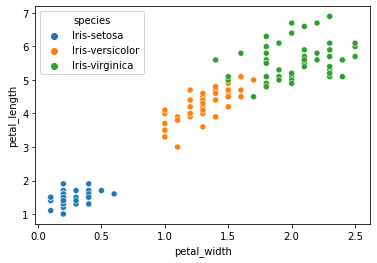

In [23]:
sns.scatterplot(x="petal_width",y="petal_length",hue="species",data=df);

sns.lmplot() görselleştirmesini petal.length ve petal.width değişkenleriyle implemente edelim. Petal length ile petal width arasında ne tür bir ilişki var ve bu ilişki güçlü müdür? sorusunu yanıtlayalım.

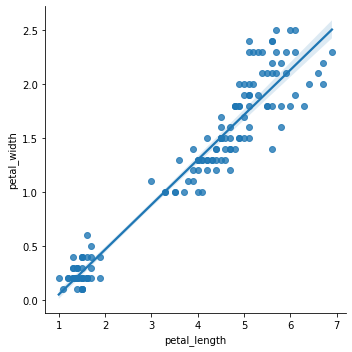

In [24]:
sns.lmplot(x="petal_length",y="petal_width",data=df) # Doğrusal grafik üzerinde birbirleriyle olan ilişkilerini göstermek için lmplot fonksiyonunu kullandık.

Bu sorunun yanıtını pekiştirmek için iki değişken arasında korelasyon katsayısını yazdıralım. 

In [25]:
df.corr()["petal_length"]["petal_width"] # İki değişken arasındaki korelasyon ilişkisinin kuvvetini öğreniyoruz bu foknksiyon aracılığıyla.

0.9627570970509662

Petal Length ile Sepal Length değerlerini toplayarak yeni bir total length özniteliği oluşturalım.

In [26]:
df["total_length"]=df["petal_length"]+df["sepal_length"]

total.length'in ortalama değerini yazdıralım. 

In [27]:
df["total_length"].mean() # Ortalama değer aldık.

9.602000000000004

total.length'in standart sapma değerini yazdıralım.

In [28]:
df["total_length"].std() # Standart sapma değerini bulduk.

2.5191739884121978

sepal.length'in maksimum değerini yazdıralım.

In [29]:
df["sepal_length"].max() # Maksimum değer aldık.

7.9

sepal.length'i 5.5'den büyük ve türü setosa olan gözlemleri yazdıralım.

In [30]:
 df[(df["sepal_length"]>5.5)&(df["species"]=="Iris-setosa")]

,sepal_length,sepal_width,petal_length,petal_width,species,total_length
14,5.8,4.0,1.2,0.2,Iris-setosa,7.0
15,5.7,4.4,1.5,0.4,Iris-setosa,7.2
18,5.7,3.8,1.7,0.3,Iris-setosa,7.4


petal.length'i 5'den küçük ve türü virginica olan gözlemlerin sadece sepal.length ve sepal.width değişkenlerini ve değerlerini yazdıralım.

In [31]:
df[(df["petal_length"]<5)&(df["species"]=="Iris-virginica")][["sepal_length","sepal_width"]]

,sepal_length,sepal_width
106,4.9,2.5
121,5.6,2.8
123,6.3,2.7
126,6.2,2.8
127,6.1,3.0
138,6.0,3.0


Hedef değişkenimiz variety'e göre bir gruplama işlemi yapalım değişken değerlerimizin ortalamasını görüntüleyelim.

In [32]:
df.groupby(["species"]).mean() 

,sepal_length,sepal_width,petal_length,petal_width,total_length
species,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,6.470
Iris-versicolor,5.936,2.770,4.260,1.326,10.196
Iris-virginica,6.588,2.974,5.552,2.026,12.140


Hedef değişkenimiz variety'e göre gruplama işlemi yaparak sadece petal.length değişkenimizin standart sapma değerlerini yazdıralım. 

In [33]:
df.groupby(["species"])["petal_length"].std()

species
Iris-setosa        0.173511
Iris-versicolor    0.469911
Iris-virginica     0.551895
Name: petal_length, dtype: float64

Emeğiniz, ayırdığınız vakit ve ilginiz için teşekkürler.